# Binary Classification - Biogradability (USING FINGERPRINTS)

Reading the data into python

In [3]:
import pandas as pd

csv_file_path = "./biodegrad.csv" #path to the CSV file

df = pd.read_csv(csv_file_path) #load csv file in dataframe

pd.set_option('display.max_columns', None) #viewing dataframe
df

,Index,Substance Name,Name type,CAS Number,Source,Smiles,Class,pka_acid_1,pka_acid_2,pka_acid_3,pka_acid_4,pka_base_1,pka_base_2,pka_base_3,pka_base_4,α_acid_0,α_acid_1,α_acid_2,α_acid_3,α_acid_4,α_base_0,α_base_1,α_base_2,α_base_3,α_base_4
0,0,"Cyclopenta[c]cyclopropa[g][1,6]diazacyclotetra...",NaN,923604-58-4,ClassDataset_original,COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)O)C[...,0,4.1,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000500,0.996990,0.002504,6.290580e-06,1.580120e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000
1,1,2-methylprop-2-enoic acid,IUPAC Name,79-41-4,ClassDataset_original,C=C(C)C(=O)O,1,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000629,0.996861,0.002504,6.289770e-06,1.579920e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000
2,2,3-(Diisobutoxy-thiophosphorylsulfanyl)-2-methy...,IUPAC Name,268567-32-4,ClassDataset_original,CC(C)COP(=S)(OCC(C)C)SCC(C)C(=O)O,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000629,0.996861,0.002504,6.289770e-06,1.579920e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000
3,3,"Phenol, 2-methyl-4,6-dinitro-",IUPAC Name,534-52-1,ClassDataset_original,Cc1cc([N+](=O)[O-])cc([N+](=O)[O-])c1O,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000629,0.996861,0.002504,6.289770e-06,1.579920e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000
4,4,"2-[4-(1,3-dihydro-1,3-dioxo-2H-isoindol-2-yl)p...",NaN,94232-67-4,ClassDataset_original,CCC(C(=O)O)c1ccc(N2C(=O)c3ccccc3C2=O)cc1,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000629,0.996861,0.002504,6.289770e-06,1.579920e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6134,6134,NaN,NaN,NaN,ClassDataset_external,Sc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl,0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.997488,0.002506,0.000006,1.580910e-08,3.971070e-11,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000
6135,6135,NaN,NaN,NaN,ClassDataset_external,Sc1cccc2ccccc12,0,6.5,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.111566,0.886202,0.002226,5.591560e-06,1.404540e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000
6136,6136,NaN,NaN,NaN,ClassDataset_external,Sc1nc2ccccc2[nH]1,0,2.5,10.0,10.0,10.0,0.0,0.0,0.0,6.1,0.000013,0.997476,0.002506,6.293650e-06,1.580890e-08,3.011350e-24,7.564180e-17,1.900030e-09,4.772672e-02,0.952273
6137,6137,NaN,NaN,NaN,ClassDataset_external,Sc1nc2ccccc2s1,0,2.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000004,0.997484,0.002506,6.293700e-06,1.580910e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000


Data Cleansing - remove columns 'Name type', 'CAS Number', 'Source'

In [4]:
columns_to_remove = ['Source', 'CAS Number', 'Name type'] #columns not needed

df = df.drop(columns=columns_to_remove) #remove those columns
df

,Index,Substance Name,Smiles,Class,pka_acid_1,pka_acid_2,pka_acid_3,pka_acid_4,pka_base_1,pka_base_2,pka_base_3,pka_base_4,α_acid_0,α_acid_1,α_acid_2,α_acid_3,α_acid_4,α_base_0,α_base_1,α_base_2,α_base_3,α_base_4
0,0,"Cyclopenta[c]cyclopropa[g][1,6]diazacyclotetra...",COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)O)C[...,0,4.1,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000500,0.996990,0.002504,6.290580e-06,1.580120e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000
1,1,2-methylprop-2-enoic acid,C=C(C)C(=O)O,1,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000629,0.996861,0.002504,6.289770e-06,1.579920e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000
2,2,3-(Diisobutoxy-thiophosphorylsulfanyl)-2-methy...,CC(C)COP(=S)(OCC(C)C)SCC(C)C(=O)O,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000629,0.996861,0.002504,6.289770e-06,1.579920e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000
3,3,"Phenol, 2-methyl-4,6-dinitro-",Cc1cc([N+](=O)[O-])cc([N+](=O)[O-])c1O,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000629,0.996861,0.002504,6.289770e-06,1.579920e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000
4,4,"2-[4-(1,3-dihydro-1,3-dioxo-2H-isoindol-2-yl)p...",CCC(C(=O)O)c1ccc(N2C(=O)c3ccccc3C2=O)cc1,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000629,0.996861,0.002504,6.289770e-06,1.579920e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6134,6134,NaN,Sc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl,0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.997488,0.002506,0.000006,1.580910e-08,3.971070e-11,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000
6135,6135,NaN,Sc1cccc2ccccc12,0,6.5,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.111566,0.886202,0.002226,5.591560e-06,1.404540e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000
6136,6136,NaN,Sc1nc2ccccc2[nH]1,0,2.5,10.0,10.0,10.0,0.0,0.0,0.0,6.1,0.000013,0.997476,0.002506,6.293650e-06,1.580890e-08,3.011350e-24,7.564180e-17,1.900030e-09,4.772672e-02,0.952273
6137,6137,NaN,Sc1nc2ccccc2s1,0,2.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000004,0.997484,0.002506,6.293700e-06,1.580910e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [6]:
X = df.drop(columns=['Index', 'Substance Name', 'Smiles', 'Class'])#remove these columns for training the model
y = df['Class']#dependent variable

# Encode categorical variables if necessary
# For example, if there are categorical columns, you can use pd.get_dummies
# X = pd.get_dummies(X)

# splitting the data into train, test, validate sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state = 1) #train = .8, test = .2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 1) #train = .6, val = .2

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Predict the target for the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the Decision Tree model:")
print(accuracy)



Accuracy of the Decision Tree model:
0.6571661237785016


Convert Smiles strings to RDKit Package molecule objects and molecule objects to molecular fingerprints

In [11]:
from rdkit import Chem, RDLogger
from rdkit.Chem import AllChem, MACCSkeys

def smiles_to_molecule(smiles): #function that converts Smiles to RDKit molecule object
    try:
        molecule = Chem.MolFromSmiles(smiles)
        return molecule
    except:
        return None  # Return None if unable to convert

# apply the conversion function to the SMILES column
RDLogger.DisableLog('rdApp.*') #ignoring hydrogen warning
df['Molecule'] = df['Smiles'].apply(smiles_to_molecule)
df['Fingerprint'] = [MACCSkeys.GenMACCSKeys(mol) for mol in df['Molecule']]
df

,Index,Substance Name,Smiles,Class,pka_acid_1,pka_acid_2,pka_acid_3,pka_acid_4,pka_base_1,pka_base_2,pka_base_3,pka_base_4,α_acid_0,α_acid_1,α_acid_2,α_acid_3,α_acid_4,α_base_0,α_base_1,α_base_2,α_base_3,α_base_4,Molecule,Fingerprint
0,0,"Cyclopenta[c]cyclopropa[g][1,6]diazacyclotetra...",COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)O)C[...,0,4.1,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000500,0.996990,0.002504,6.290580e-06,1.580120e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023C502...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,2-methylprop-2-enoic acid,C=C(C)C(=O)O,1,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000629,0.996861,0.002504,6.289770e-06,1.579920e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023C502...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,3-(Diisobutoxy-thiophosphorylsulfanyl)-2-methy...,CC(C)COP(=S)(OCC(C)C)SCC(C)C(=O)O,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000629,0.996861,0.002504,6.289770e-06,1.579920e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023C502...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,"Phenol, 2-methyl-4,6-dinitro-",Cc1cc([N+](=O)[O-])cc([N+](=O)[O-])c1O,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000629,0.996861,0.002504,6.289770e-06,1.579920e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023C502...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,"2-[4-(1,3-dihydro-1,3-dioxo-2H-isoindol-2-yl)p...",CCC(C(=O)O)c1ccc(N2C(=O)c3ccccc3C2=O)cc1,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000629,0.996861,0.002504,6.289770e-06,1.579920e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023C502...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6134,6134,NaN,Sc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl,0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.997488,0.002506,0.000006,1.580910e-08,3.971070e-11,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023C503...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6135,6135,NaN,Sc1cccc2ccccc12,0,6.5,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.111566,0.886202,0.002226,5.591560e-06,1.404540e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023C503...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6136,6136,NaN,Sc1nc2ccccc2[nH]1,0,2.5,10.0,10.0,10.0,0.0,0.0,0.0,6.1,0.000013,0.997476,0.002506,6.293650e-06,1.580890e-08,3.011350e-24,7.564180e-17,1.900030e-09,4.772672e-02,0.952273,<rdkit.Chem.rdchem.Mol object at 0x0000023C503...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6137,6137,NaN,Sc1nc2ccccc2s1,0,2.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.000004,0.997484,0.002506,6.293700e-06,1.580910e-08,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023C503...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Class
0    3995
1    2144
Name: count, dtype: int64 

Unique fingerprints: 5292
Unique smiles: 6137
Total items: 6139


,Index,Substance Name,Smiles,Class,pka_acid_1,pka_acid_2,pka_acid_3,pka_acid_4,pka_base_1,pka_base_2,pka_base_3,pka_base_4,α_acid_0,α_acid_1,α_acid_2,α_acid_3,α_acid_4,α_base_0,α_base_1,α_base_2,α_base_3,α_base_4,Molecule,Fingerprint,Fingerprint String,Duplicate,Duplicate Fingerprint,Duplicate Smiles
4610,4610,NaN,C,0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.997488,0.002506,0.000006,1.580910e-08,3.971070e-11,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.0,<rdkit.Chem.rdchem.Mol object at 0x0000023C50317530>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000,False,False,False
4397,4397,benzaldehyde,O=Cc1ccccc1,1,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.997488,0.002506,0.000006,1.580910e-08,3.971070e-11,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.0,<rdkit.Chem.rdchem.Mol object at 0x0000023C50311770>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000011110,False,False,False
4935,4935,NaN,CC=O,1,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.997488,0.002506,0.000006,1.580910e-08,3.971070e-11,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.0,<rdkit.Chem.rdchem.Mol object at 0x0000023C50320510>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000001000100,False,False,False
2011,2011,"Benzaldehyde, 4-methyl-",Cc1ccc(C=O)cc1,1,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.997488,0.002506,0.000006,1.580910e-08,3.971070e-11,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.0,<rdkit.Chem.rdchem.Mol object at 0x0000023C502B7A00>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000001011110,False,False,False
4753,4753,NaN,CC(=O)c1ccccc1,1,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.997488,0.002506,0.000006,1.580910e-08,3.971070e-11,2.511890e-30,6.309570e-23,1.584890e-15,3.981070e-08,1.0,<rdkit.Chem.rdchem.Mol object at 0x0000023C5031B450>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000101000001011110,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

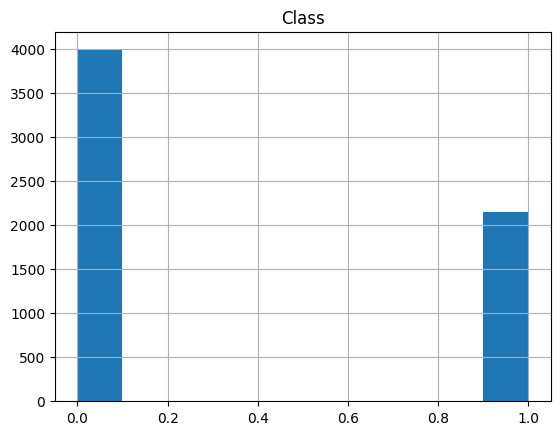

In [60]:
from rdkit.DataStructs.cDataStructs import ExplicitBitVect

#creating string representations of the fingerprint vectors
df['Fingerprint String'] = [ExplicitBitVect.ToBitString(fp) for fp in df['Fingerprint']]

#sorting the fingerprint strings and displaying distribution info
df = df.sort_values(by = ['Fingerprint String'], ascending = True)
df.hist(column = ['Class'])
print(df['Class'].value_counts(), "\n")

#creating another column with duplicate indicators
df['Duplicate Fingerprint'] = df.duplicated(subset = ['Fingerprint String'])
df['Duplicate Smiles'] = df.duplicated(subset = ['Smiles'])

#printing counts
print("Unique fingerprints:", df['Fingerprint String'].nunique())
print("Unique smiles:", df['Smiles'].nunique())
print("Total items:", df.shape[0])

df

Upon finding two matching SMILES, I extracted them to another dataframe, df2, just to find that they were not duplicates--one was just part of another (similar but fundamentally different).

In [63]:
#extract duplicates from df and put in a secondary dataframe, if found then modify the original df
pd.options.display.max_colwidth = None

#creating a separate dataframe
df2 = pd.DataFrame()
# print(df.iloc[0, -1])

#iterating over all rows
for i in range(df.shape[0]):
    #if a duplicate, add to df2
    if df.iloc[i, -1]:
        df2 = pd.concat([df2, df.iloc[i, [2, 3, -1]]])
        # print(df.iloc[i,[2,3,-2]])
        # print('added!') #it is indeed adding
df2.transpose()

#don't know how to combine their columns ...

,Smiles,Class,Duplicate Smiles,Smiles,Class,Duplicate Smiles
3073,CCCCOP(=O)([O-])OCCCC,0,True,NaN,NaN,NaN
2453,NaN,NaN,NaN,CCCCC(CC)COP(=O)([O-])OCC(CC)CCCC,1,True


In [64]:
#retraining the model
X = np.array([list(fp) for fp in df['Fingerprint']]) #only include fingerprint
y = np.array(df['Class'])#dependent variable
#checking matching dimensions
print(X.shape)
print(y.shape)

#splitting the data into train, test, validate sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state = 1) #train = .8, test = .2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 1) #train = .6, val = .2

clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Predict the target for the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the Decision Tree model:")
print(accuracy)

(6139, 167)
(6139,)

Accuracy of the Decision Tree model:
0.753257328990228


In [9]:
rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("\nAccuracy of the Random Forest model:")
print(accuracy_rfc)


Accuracy of the Random Forest model:
0.8102605863192183


In [10]:
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 10)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print("\nAccuracy of the Gradient Boosting model:")
print(accuracy_gbc)


Accuracy of the Gradient Boosting model:
0.7939739413680782
